In [126]:
!python3 --version

Python 3.10.11


In [ ]:
!pip install geopandas
!pip install folium mapclassify
!pip install -U pysal urbanaccess pandana libpysal esda
!apt install libspatialindex-dev

In [ ]:
!pip install libpysal
!pip install esda
!pip install mapclassify
!pip install splot

In [ ]:
!pip install --upgrade shapely
!pip install --upgrade libpysal

In [130]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium ## folium.Map
import libpysal as ps ## wagi
import esda ## statystyka morana
import mapclassify
from splot.esda import lisa_cluster ## wykres: kartogram ze skupiskami
from splot.esda import moran_scatterplot ## wykres: wykres rozrzutu ze statystyką morana
%matplotlib inline

In [131]:
plt.rcParams['figure.figsize'] = [8, 8]

In [132]:
pow_df = gpd.read_file(filename = "Powiaty.shp", encoding = "utf-8")
pow_df = pow_df[["JPT_KOD_JE", "JPT_NAZWA_", "geometry"]]
pow_df.head(n = 3)

,JPT_KOD_JE,JPT_NAZWA_,geometry
0,1815,powiat ropczycko-sędziszowski,"POLYGON ((692305.365 260282.248, 692313.646 26..."
1,1410,powiat łosicki,"POLYGON ((753920.175 497017.076, 753918.822 49..."
2,1418,powiat piaseczyński,"POLYGON ((644442.384 473992.041, 644345.678 47..."


In [133]:
pow_df.query("JPT_NAZWA_ == 'powiat Warszawa'")

,JPT_KOD_JE,JPT_NAZWA_,geometry
296,1465,powiat Warszawa,"POLYGON ((628292.098 492055.177, 628292.963 49..."


In [134]:
pow_df.JPT_NAZWA_[296]

'powiat Warszawa'

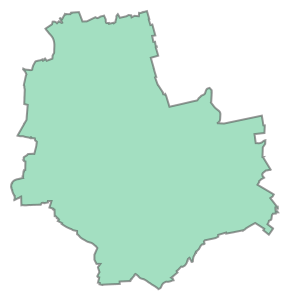

In [135]:
pow_df.geometry[296]

<Axes: >

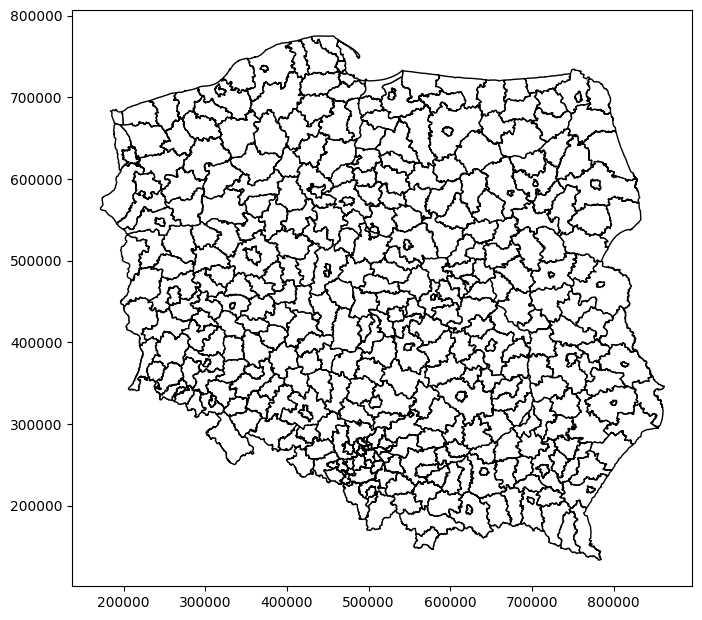

In [136]:
pow_df.plot(color = "white", edgecolor = "black")

In [137]:
pow_df["kod_woj"] = pow_df.JPT_KOD_JE.str.slice(stop = 2)
pow_df.head(n = 2)

,JPT_KOD_JE,JPT_NAZWA_,geometry,kod_woj
0,1815,powiat ropczycko-sędziszowski,"POLYGON ((692305.365 260282.248, 692313.646 26...",18
1,1410,powiat łosicki,"POLYGON ((753920.175 497017.076, 753918.822 49...",14


<Axes: >

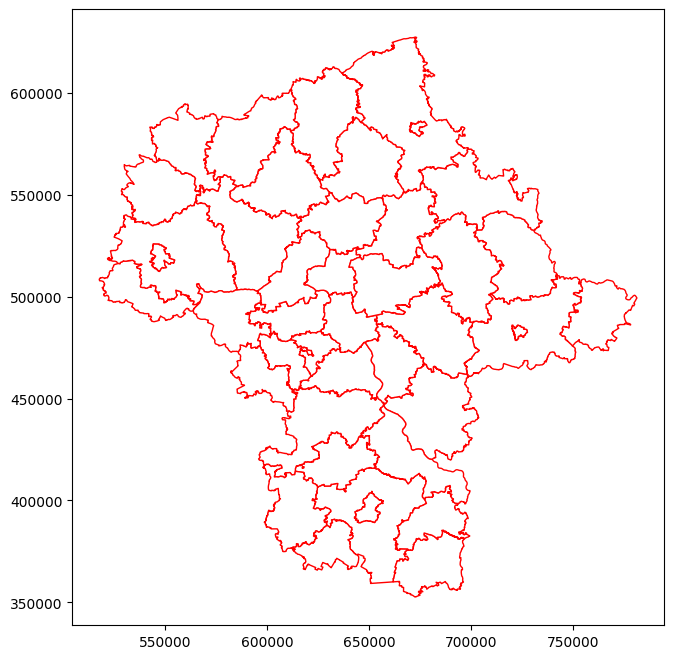

In [138]:
pow_df.query("kod_woj == '14'").plot(color = "white", edgecolor = "red")

In [139]:
pow_df.explore()

In [ ]:
wynag = pd.read_excel(io = "Dane_powiaty.xlsx", sheet_name="Dane")
wynag = wynag[["Kod", "Nazwa", "X6"]]
wynag["kod"] = wynag.Kod.astype(str).str.zfill(7)
wynag["kod"] = wynag.kod.str.slice(start=0,stop=4)
wynag.head(n=2)

In [158]:
pow_df_dane = pd.merge(left = pow_df, 
                       right = wynag[["kod", "X6"]], 
                       how = "left",
                       left_on = "JPT_KOD_JE", 
                       right_on = "kod")
pow_df_dane.head(n=3)

,JPT_KOD_JE,JPT_NAZWA_,geometry,kod_woj,kod,X6
0,1815,powiat ropczycko-sędziszowski,"POLYGON ((692305.365 260282.248, 692313.646 26...",18,1815,3898.215355
1,1410,powiat łosicki,"POLYGON ((753920.175 497017.076, 753918.822 49...",14,1410,3800.572257
2,1418,powiat piaseczyński,"POLYGON ((644442.384 473992.041, 644345.678 47...",14,1418,4739.746248


<Axes: >

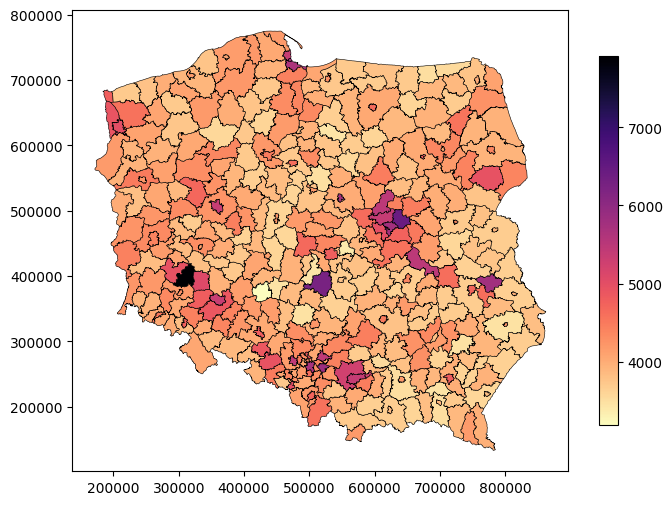

In [159]:
pow_df_dane.plot(column = "X6", cmap = "magma_r", 
                 legend = True, edgecolor = "black", 
                 linewidth = 0.4, legend_kwds = {'shrink': 0.6})

In [160]:
W = ps.weights.Queen.from_dataframe(pow_df_dane)
W.transform

'O'

In [161]:
W.full()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
W.full()[0][0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [163]:
W.transform = "r" ## standaryzacja wierszami
W.full()[0][:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [164]:
W.full()[0][0,:]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [165]:
stat_moran = esda.moran.Moran(pow_df_dane.X6, W)
stat_moran.I

0.2710599104389786

In [166]:
stat_moran.p_norm

8.881784197001252e-16

In [167]:
stat_moran.seI_norm

0.034054196784333135

Wyznaczamy statystykę Morana I korzystając z następującego wzoru:

$$
I = \frac{\mathbf{z}^T \mathbf{W}^*\mathbf{z} }{\mathbf{z}^T \mathbf{z}}
$$

In [168]:
z = pow_df_dane.X6 - np.mean(pow_df_dane.X6)
W_star = W.full()[0]
I_recznie = (np.transpose(z) @ W_star @ z) / (np.transpose(z) @ z) # %*%
I_recznie

0.27105991043897854

In [171]:
np.random.seed(1)
lokalny_moran = esda.moran.Moran_Local(pow_df_dane.X6, W)
lokalny_moran

In [172]:
np.mean(lokalny_moran.Is), np.std(lokalny_moran.Is)

(0.27034659488519175, 0.8313844915528785)

In [173]:
np.sum(lokalny_moran.p_z_sim < 0.05)

57

<Axes: ylabel='Frequency'>

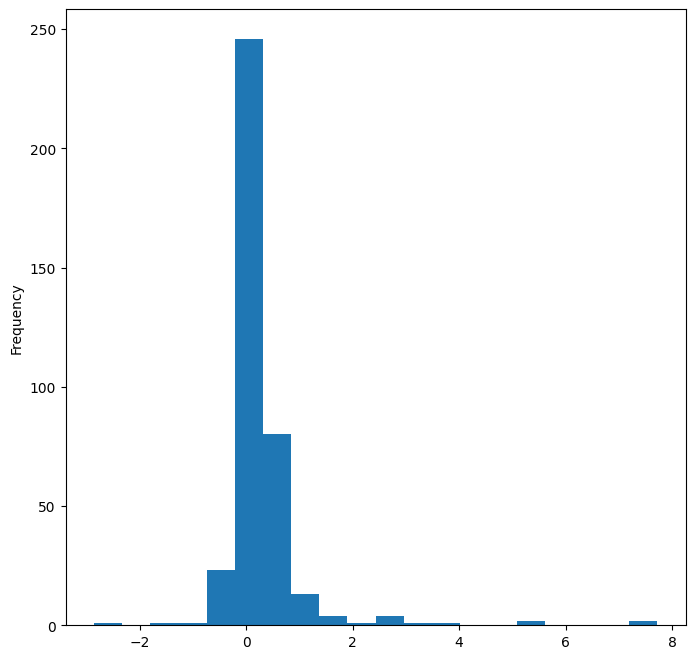

In [174]:
pow_df_dane["moran2"] = pd.DataFrame(lokalny_moran.Is)
pow_df_dane.moran2.plot.hist(bins = 20)

In [175]:
pow_df_dane.sort_values(by = "moran2",  ascending=True)

,JPT_KOD_JE,JPT_NAZWA_,geometry,kod_woj,kod,X6,moran2
287,1001,powiat bełchatowski,"POLYGON ((513270.942 401055.909, 513272.985 40...",10,1001,6259.402009,-2.858894
119,0610,powiat łęczyński,"POLYGON ((766042.589 397775.149, 766071.683 39...",06,0610,5772.288015,-1.782666
131,1462,powiat Płock,"POLYGON ((547229.536 512214.079, 547174.596 51...",14,1462,5705.320356,-0.753174
288,1003,powiat łaski,"POLYGON ((507456.185 424725.895, 507432.021 42...",10,1003,3432.414359,-0.732584
41,0463,powiat Toruń,"POLYGON ((469809.444 566496.220, 469799.945 56...",04,0463,4629.363200,-0.731151
...,...,...,...,...,...,...,...
90,0211,powiat lubiński,"POLYGON ((304562.111 402678.643, 304560.779 40...",02,0211,7915.008187,3.937141
65,1432,powiat warszawski zachodni,"POLYGON ((622702.155 499126.609, 622706.961 49...",14,1432,5375.266932,5.184044
296,1465,powiat Warszawa,"POLYGON ((628292.098 492055.177, 628292.963 49...",14,1465,6432.778018,5.270253
162,1421,powiat pruszkowski,"POLYGON ((620124.736 471245.122, 620316.897 47...",14,1421,5757.058485,7.339203


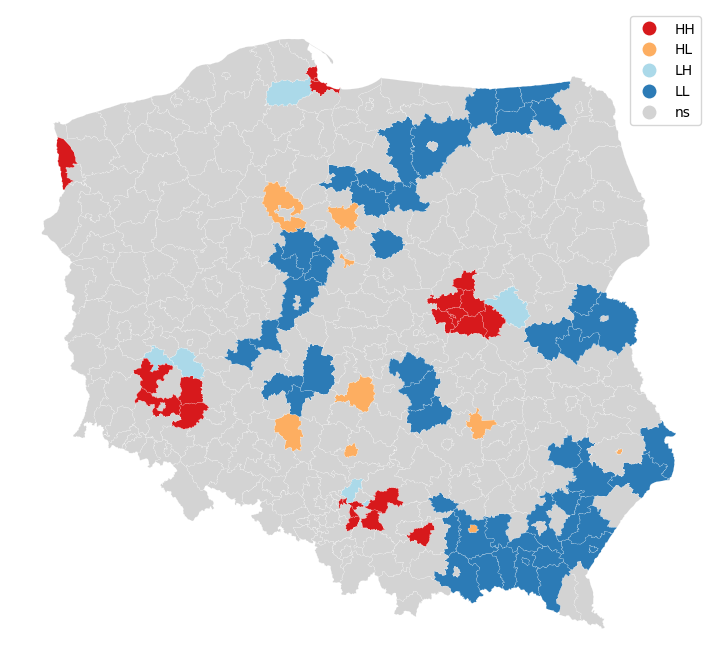

In [176]:
lisa_cluster(lokalny_moran, pow_df_dane, p = 0.05, figsize = (9,9))
plt.show()

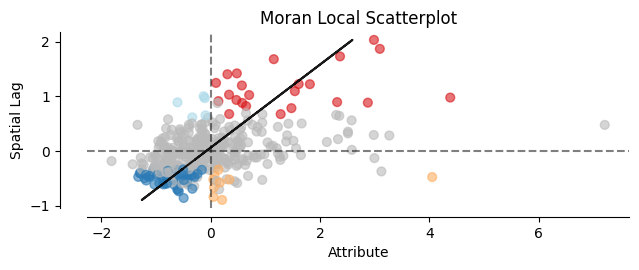

In [177]:
fig, ax = moran_scatterplot(lokalny_moran, p = 0.05)
plt.show()